In [252]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import tensorflow as tf
from sklearn import linear_model
from sklearn.metrics import r2_score



In [19]:
url='https://es.wikipedia.org/wiki/Buenos_Aires'
res=requests.get(url)
soup=BeautifulSoup(res.text, 'html.parser')
pagina=pd.read_html(url)

In [2]:
df_homicidios=pd.read_csv('datasetdashboard\Datos_homicidios.csv')

In [6]:
# Extraer el mes de la fecha y calcular el semestre
df_homicidios['FECHA']=pd.to_datetime(df_homicidios['FECHA'])

In [11]:
df_homicidios['SEMESTRE'] = ((df_homicidios['FECHA'].dt.month-1)//6)+1

In [35]:
df_homicidios.sample(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Longitud,Latitud,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
616,2020-0077,1,2020-12-25,2020,12,25,06:40:00,6,SAN MARTIN AV. Y PUNTA ARENAS,AVENIDA,...,-58.47220945,-34.60111373,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,FEMENINO,30.0,2020-12-25 00:00:00,2
217,2017-0085,1,2017-07-07,2017,7,7,14:15:00,14,TACUARI Y AV. MARTIN GARCIA,AVENIDA,...,-58.37261143,-34.63150425,PEATON-PASAJEROS,PASAJEROS,PEATON,PEATON,MASCULINO,84.0,2017-07-07 00:00:00,2
648,2021-0029,1,2021-03-31,2021,3,31,18:05:00,18,"FALCON, RAMON L., CNEL. Y SAN PEDRITO AV.",AVENIDA,...,-58.46899119,-34.63215432,AUTO-AUTO,AUTO,CONDUCTOR,AUTO,MASCULINO,26.0,2021-04-02 00:00:00,1
532,2019-0098,1,2019-11-25,2019,11,25,14:00:00,14,GUZMAN 365,AVENIDA,...,-58.45134029,-34.58984288,PASAJEROS-PASAJEROS,PASAJEROS,PASAJERO_ACOMPAÑANTE,PASAJEROS,FEMENINO,61.0,2019-11-29 00:00:00,2
647,2021-0028,1,2021-03-29,2021,3,29,17:20:00,17,"COREA AV. y TORRES Y TENORIO, PRES",AVENIDA,...,-58.44147621,-34.64357704,PEATON-PASAJEROS,PASAJEROS,PEATON,PEATON,MASCULINO,NaN,2021-03-29 00:00:00,1


In [96]:
poblacion=pagina[4]

victimas_por_semestre=

In [48]:
homicidios_semestre = df_homicidios.groupby(['AAAA', 'SEMESTRE'])['N_VICTIMAS'].sum().reset_index()
homicidios_semestre


,AAAA,SEMESTRE,N_VICTIMAS
0,2016,1,65
1,2016,2,81
2,2017,1,69
3,2017,2,71
4,2018,1,70
5,2018,2,79
6,2019,1,57
7,2019,2,47
8,2020,1,31
9,2020,2,50


In [60]:
poblacion.columns=poblacion.columns.droplevel(0)

,Año,Pob.,±%
0,1779,24 205,—
1,1810,44 800,+85.1%
2,1869,177 797,+296.9%
3,1895,663 854,+273.4%
4,1914,1 575 814,+137.4%
5,1947,2 981 043,+89.2%
6,1960,2 966 634,−0.5%
7,1970,2 972 453,+0.2%
8,1980,2 922 829,−1.7%
9,1991,2 965 403,+1.5%


In [213]:
poblacion['Pob.']=poblacion['Pob.'].str.replace("\xa0",'')
poblacion=poblacion.rename(columns={'Pob.':'Poblacion'})

In [222]:
X=poblacion.Año.values.reshape(-1,1)
y=poblacion.Poblacion.values.reshape(-1,1)
X_selected = X.tolist()  # Convierte X_selected a lista
y_selected = y.tolist() 

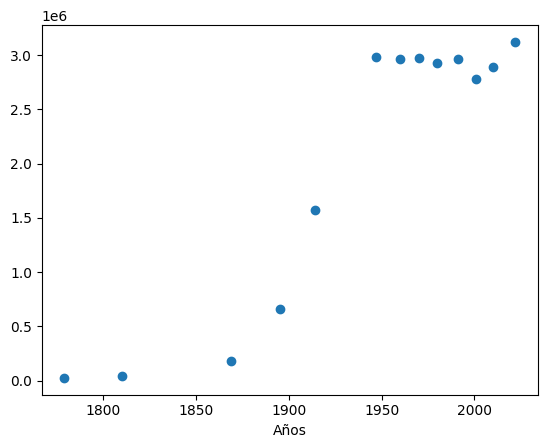

In [224]:
plt.scatter(X_selected,y_selected)
plt.xlabel('Años')
plt.show()

In [348]:
poly = PolynomialFeatures(degree=35)
X_poly = poly.fit_transform(X_selected,y_selected)

In [349]:
linear_regression = LinearRegression()
linear_regression.fit(X_poly,y_selected)

LinearRegression()

In [350]:
y_head2 = linear_regression.predict(X_poly)

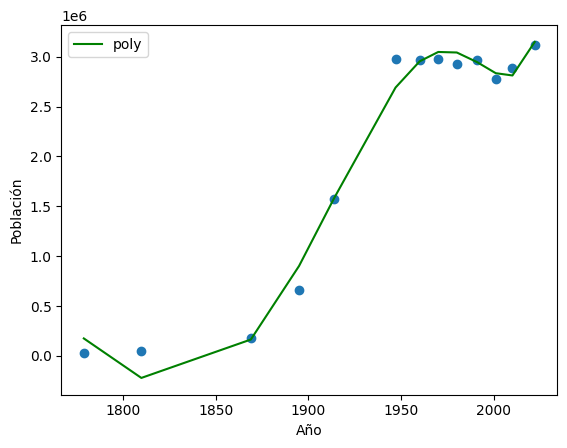

In [351]:
# Crear la gráfica
plt.plot(X_selected,y_head2,color='green',label='poly')
plt.legend()
plt.scatter(X_selected, y_selected)
plt.xlabel('Año')
plt.ylabel('Población')
plt.show()

In [352]:
r2_score(y,y_head2)

0.986928753991956

In [353]:
def predicted_population(year):
    X_pred = poly.transform([[year]])
    predicted_population = linear_regression.predict(X_pred)
    return int(predicted_population)

In [354]:
homicidios_semestre['Poblacion']=homicidios_semestre['AAAA'].apply(predicted_population)

In [355]:
homicidios_semestre

,AAAA,SEMESTRE,N_VICTIMAS,Poblacion
0,2016,1,65,2904428
1,2016,2,81,2904428
2,2017,1,69,2932760
3,2017,2,71,2932760
4,2018,1,70,2965571
5,2018,2,79,2965571
6,2019,1,57,3003186
7,2019,2,47,3003186
8,2020,1,31,3045943
9,2020,2,50,3045943


In [357]:
homicidios_semestre['%_homicidios']=(homicidios_semestre['N_VICTIMAS']/homicidios_semestre['Poblacion'])*100

In [358]:
homicidios_semestre

,AAAA,SEMESTRE,N_VICTIMAS,Poblacion,%_homicidios
0,2016,1,65,2904428,0.002238
1,2016,2,81,2904428,0.002789
2,2017,1,69,2932760,0.002353
3,2017,2,71,2932760,0.002421
4,2018,1,70,2965571,0.002360
5,2018,2,79,2965571,0.002664
6,2019,1,57,3003186,0.001898
7,2019,2,47,3003186,0.001565
8,2020,1,31,3045943,0.001018
9,2020,2,50,3045943,0.001642


In [361]:
for index, row in homicidios_semestre.iterrows():
    if index !=0:
        homicidios_semestre.at[index,'diff']=((row['%_homicidios']-semestre_pasado)/semestre_pasado)*100
    if index==0:
        homicidios_semestre.at[index,'diff']=np.nan
    semestre_pasado=row['%_homicidios']

In [362]:
homicidios_semestre

,AAAA,SEMESTRE,N_VICTIMAS,Poblacion,%_homicidios,diff
0,2016,1,65,2904428,0.002238,NaN
1,2016,2,81,2904428,0.002789,24.615385
2,2017,1,69,2932760,0.002353,-15.637748
3,2017,2,71,2932760,0.002421,2.898551
4,2018,1,70,2965571,0.002360,-2.499265
5,2018,2,79,2965571,0.002664,12.857143
6,2019,1,57,3003186,0.001898,-28.751806
7,2019,2,47,3003186,0.001565,-17.543860
8,2020,1,31,3045943,0.001018,-34.968422
9,2020,2,50,3045943,0.001642,61.290323


In [356]:
año2022=predicted_population(2022)
año2022

3148316